In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\f.pranata\Documents\netflix_userbase.csv")

In [4]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [7]:
df.sort_values(by = 'Gender', ascending = False)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1991,1992,Basic,14,30-07-22,10-07-23,Canada,39,Male,Smartphone,1 Month
1045,1046,Basic,13,06-10-22,03-07-23,United States,27,Male,Laptop,1 Month
1044,1045,Basic,13,04-10-22,01-07-23,United States,27,Male,Tablet,1 Month
1043,1044,Premium,11,26-09-22,03-07-23,Canada,46,Male,Tablet,1 Month
...,...,...,...,...,...,...,...,...,...,...
1102,1103,Standard,14,02-08-22,01-07-23,United States,49,Female,Tablet,1 Month
1101,1102,Basic,15,27-07-22,03-07-23,Spain,32,Female,Smartphone,1 Month
1100,1101,Premium,11,21-07-22,01-07-23,Spain,33,Female,Tablet,1 Month
1098,1099,Premium,13,08-07-22,02-07-23,Spain,51,Female,Laptop,1 Month


In [10]:
# Total countries

total_countries = df['Country'].nunique()
total_countries

10

In [28]:
# Total subscription by country

total_subscription = df.groupby('Country')['Subscription Type'].count()
total_subscription

Country
Australia         183
Brazil            183
Canada            317
France            183
Germany           183
Italy             183
Mexico            183
Spain             451
United Kingdom    183
United States     451
Name: Subscription Type, dtype: int64

In [47]:
# Data frame for country subscription

df_subscription_country = df.groupby('Country').count()
df_subscription_country.drop(['Monthly Revenue', 'Join Date', 'Last Payment Date', 'Subscription Type', 'Age', 'Gender', 'Device', 'Plan Duration'], axis = 1, inplace = True)
df_subscription_country = df_subscription_country.rename({'User ID': 'Total'}, axis = 1)

In [50]:
# Top 3 countries with the most subscription

df_subscription_country.sort_values(by = 'Total', ascending = False).head(3)

,Total
Country,
Spain,451
United States,451
Canada,317


In [34]:
# Most subscribed plan

df.groupby('Subscription Type')['User ID'].count()

Subscription Type
Basic       999
Premium     733
Standard    768
Name: User ID, dtype: int64

In [44]:
# Data frame for subscribed plan

df_subscribed_plan = df.groupby('Subscription Type').count()
df_subscribed_plan.drop(['Monthly Revenue', 'Join Date', 'Last Payment Date', 'Country', 'Age', 'Gender', 'Device', 'Plan Duration'], axis = 1, inplace = True)
df_subscribed_plan = df_subscribed_plan.rename({'User ID': 'Total'}, axis = 1)
df_subscribed_plan.sort_values('Total', ascending = True)

,Total
Subscription Type,
Premium,733
Standard,768
Basic,999


In [55]:
# Average age of users

df['Age'].mean().round()

39.0

In [54]:
# Average monthly revenue

df['Monthly Revenue'].mean()

12.5084

In [51]:
import matplotlib.pyplot as plt

In [59]:
# Most used device

device = df['Device'].value_counts()
device

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64

In [69]:
# Data frame for device

df_device = df.groupby('Device').count()
df_device.drop(['Subscription Type', 'Monthly Revenue', 'Join Date', 'Last Payment Date', 'Country', 'Age', 'Gender', 'Plan Duration'], axis = 1, inplace = True)
df_device = df_device.rename({'User ID': 'Total'}, axis = 1)
df_device.sort_values('Total', ascending = True)
df_device

,Total
Device,
Laptop,636
Smart TV,610
Smartphone,621
Tablet,633


<Axes: ylabel='Total'>

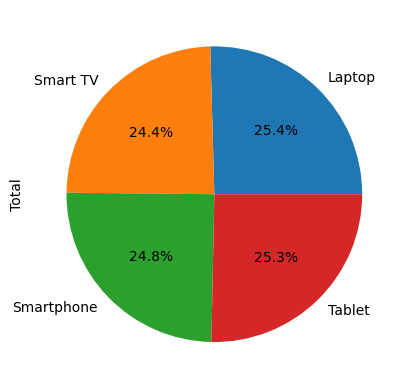

In [83]:
df_device.plot(kind = 'pie', y = 'Total', autopct='%1.1f%%', legend = False)

In [80]:
# Data frame for country

df_country = df.groupby('Country').nunique()
df_country.drop(['Subscription Type', 'Monthly Revenue', 'Join Date', 'Last Payment Date', 'Device', 'Age', 'Gender', 'Plan Duration'], axis = 1, inplace = True)
df_country = df_country.rename({'User ID': 'Total user'}, axis = 1)
df_country.sort_values('Total user', ascending = True)
df_country

,Total user
Country,
Australia,183
Brazil,183
Canada,317
France,183
Germany,183
Italy,183
Mexico,183
Spain,451
United Kingdom,183


<Axes: ylabel='Total user'>

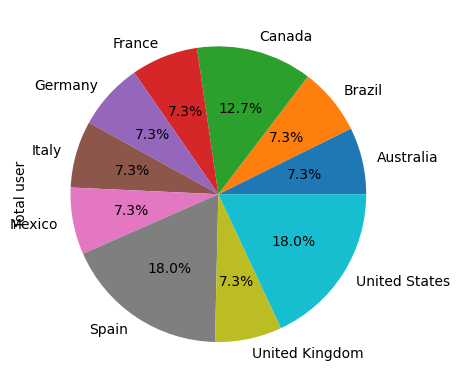

In [82]:
df_country.plot(kind = 'pie', y = 'Total user', autopct='%1.1f%%', legend = False)